<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/implementando-LIGHTbgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/aug_train.csv'

sns.set_style('white')

In [12]:
data = pd.read_csv(url)

data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [49]:
data.shape

(19158, 14)

In [17]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [18]:
data.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [19]:
data.enrollee_id.isna().sum()

0

In [20]:
data.city.isna().sum()

0

In [21]:
data.city_development_index.isna().sum()

0

In [22]:
data.gender.isna().sum()

4508

In [44]:
data.gender = data.gender.replace(np.nan, 'None')

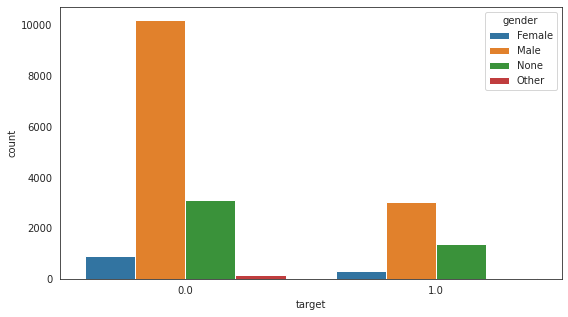

In [39]:
group_gender = data.groupby(['gender', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='target', y='count', hue='gender', data=group_gender)
plt.show()

In [50]:
data = data.dropna(axis=0)

In [53]:
data.isna().sum()

data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

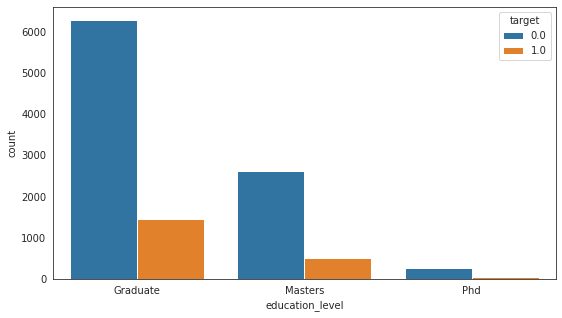

In [65]:
group_edu = data.groupby(['education_level', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='education_level', y='count', hue='target', data=group_edu)
plt.show()

In [76]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,None,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [70]:
len(data.city.value_counts())

119

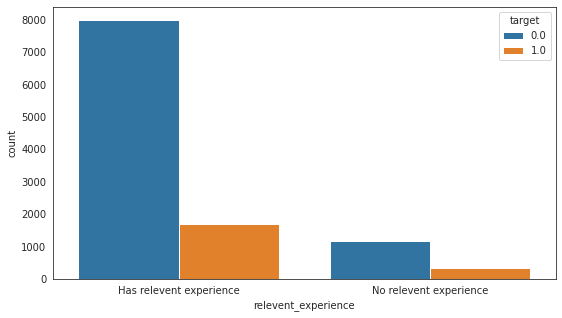

In [74]:
group_exp = data.groupby(['relevent_experience', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='relevent_experience', y='count', hue='target', data=group_exp)
plt.show()

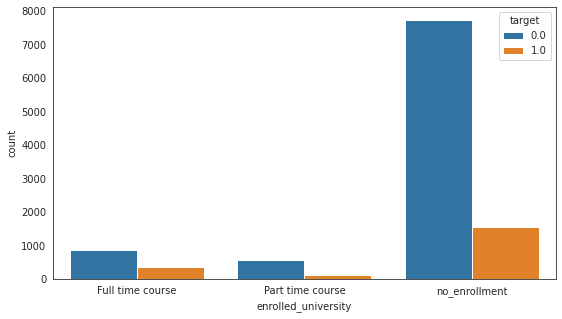

In [75]:
group_exp = data.groupby(['enrolled_university', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='enrolled_university', y='count', hue='target', data=group_exp)
plt.show()

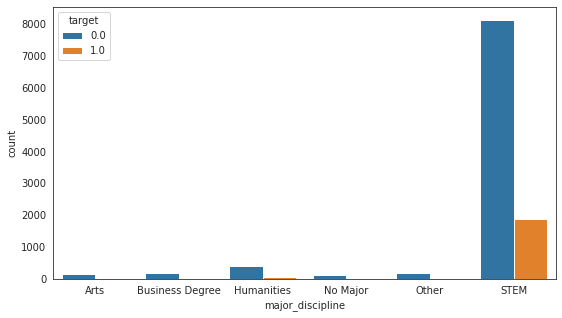

In [81]:

group_dis = data.groupby(['major_discipline', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='major_discipline', y='count', hue='target', data=group_dis)
plt.show()

In [82]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,None,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


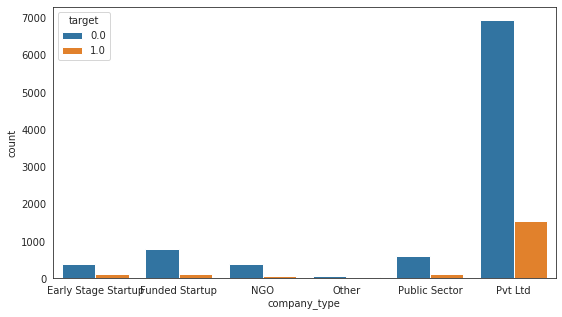

In [85]:
data.company_type.unique()

group_comp = data.groupby(['company_type', 'target']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='company_type', y='count', hue='target', data=group_comp)
plt.show()

In [94]:
data.experience.unique()

val_exp = ['>20',  '<1']

for i, j in enumerate(data.experience):

  if j == '>20':

    data.experience[i] = '20'
  
  if j == '<1':

    data.experience[i] = '1'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [96]:
data.experience.unique()

array(['20', '>20', '13', '7', '17', '5', '16', '1', '11', '<1', '14',
       '18', '19', '12', '6', '9', '3', '2', '4', '10', '8', '15'],
      dtype=object)

In [97]:
data.company_size.unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [100]:
company_act = ['<10','10/49','50-99','100-500', '500-999', '1000-4999', '5000-9999', '10000+']
company_new = ['0-10','10-49','50-99','100-499', '500-999', '1000-4999', '5000-9999', '10000']

for i, j in enumerate(company_act):

  for k,l in enumerate(data.company_size):

    if l == j:

      data.company_size[k] = company_new[i]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [102]:
data.company_size.unique()

array(['50-99', '10000', '500-999', '10000+', '100-499', '1000-4999',
       '5000-9999', '10-49', '100-500', '0-10', '10/49', '<10'],
      dtype=object)

In [7]:
data = pd.read_csv('/content/data_lightbm.csv')

In [10]:
data = data.drop('Unnamed: 0', axis=1)

In [11]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,699,city_103,0.920,None,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience',
 'company_size', 'company_type', 'last_new_job']

le = LabelEncoder()

for i in encoder:

  le.fit(data[i])

  data[i] = le.fit_transform(data[i])

In [41]:
import lightgbm as lgb

In [40]:
lenvt = int(len(data) * 0.1)

train = data.iloc[:-2*lenvt,:]

test = data.iloc[-2*lenvt:-lenvt, :]

val = data.iloc[-lenvt:, :]

# dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])

In [44]:
datacol = data.columns.drop('target')

dtrain = lgb.Dataset(train[datacol], label=train.target)
#dtest = lgb.Dataset(test[datacol], label=test.target)
dval = lgb.Dataset(val[datacol], label=val.target)

In [68]:
param = {'num_leaves':30, 'objetive':'binary', 'boosting': 'GOSS'}
param['metric'] = 'auc'
max_round = 1000

bst = lgb.train(param, dtrain, max_round, valid_sets=[dval], early_stopping_rounds=10, verbose_eval=False)

In [69]:
from sklearn import metrics

pred = bst.predict(test[datacol])

metrics.roc_auc_score(test.target, pred)

0.7377289781505186

ValueError: ignored